## Introduction

In a linear regression problem, we assume that the target variable can be approximated by a linear function of the data, that is,

$$ 
h(x) = \hat{y} = \theta_0 x_{0} + \theta_1 x_{1} + \ldots + \theta_n x_n = \langle \theta^T, x\rangle
$$

In the above expression:
- $\langle \cdot, \cdot \rangle$ is the dot product.
- $\theta = [\theta_0, \ldots, \theta_n]^T$ is the parameter vector. $\theta_i$ is the weight of the $i$-th feature in the linear regression model.
- $x$ is the feature vector. 
- $x_j$ is the value of the $j$-th feature in the input $x$.
- $x_0 = 1$

In this notebook, I present three alternative options to implement the linear regression learning algorithm, using a synthetic dataset as training data.

Lets us first generate the synthetic dataset to be used in all implementation options.

In [44]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Generate synthetic square feet data (feature)
square_feet = np.random.uniform(500, 4000, 100)  # random values between 500 and 4000

# Define the true relationship (e.g., price per square foot is 300, with a base price of 50,000)
base_price = 50000
price_per_sqft = 300

# Generate the target values with some noise
noise = np.random.normal(0, 20000, 100)  # adding some noise
house_price = base_price + price_per_sqft * square_feet + noise

We can visually inspect this synthetic dataset. See the plot generated below.

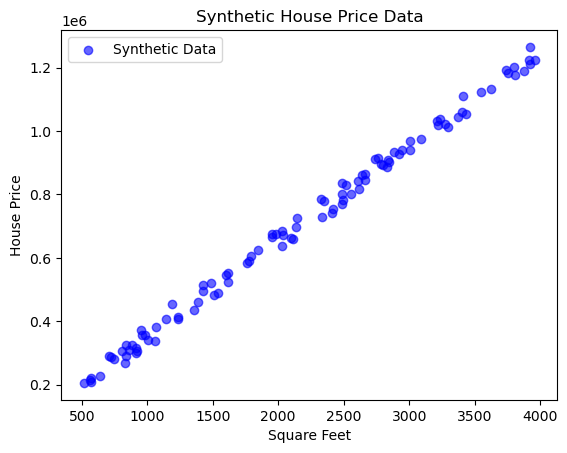

In [45]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(square_feet, house_price, color='blue', label='Synthetic Data', alpha=0.6)

# Adding labels and title
plt.xlabel('Square Feet')
plt.ylabel('House Price')
plt.title('Synthetic House Price Data')
plt.legend()

# Show the plot
plt.show()

## Option 1: Linear Regression using the Normal Equation

This option implements linear regression using the [Normal Equation](https://mathworld.wolfram.com/NormalEquation.html) to find the best fit line for the synthetic data.

There is an explicit formula to compute the parameter vector that solves the minimization problem analytically:
$$ 
\theta = (X^T X)^ {-1} X^T y, 
$$

where
- $X$ is the data matrix (objects by rows, features by columns), 
- and $y$ is the response vector. 

This formula is very useful for theoretical analysis but has some limitations:

1. It uses an "expensive" operation— inverting a matrix of size $n \times n$, where $d$ is the number of features. It requires $O(n^3)$ operations. If $n$ is large, it can be quite slow.

2. This formula is derived under the assumption of a quadratic cost function. If we want to use a different cost function, the normal equation cannot be used (and it is not always possible to derive an explicit formula that works).

In [46]:
# Add bias term to the feature matrix
X = np.c_[np.ones(square_feet.shape[0]), square_feet]  # Adding a column of ones for the intercept term
y = house_price.reshape(-1, 1)  # Target variable in column vector form

# Calculate the parameters using the Normal Equation
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Print the parameters
print(f"Intercept (theta_0): {theta[0][0]}")
print(f"Slope (theta_1): {theta[1][0]}")


Intercept (theta_0): 54623.20720208078
Slope (theta_1): 299.63962869372625


In [47]:
def predict(square_feet):
    return theta[0][0] + theta[1][0] * square_feet

# Example prediction
sample_square_feet = 2000
predicted_price = predict(sample_square_feet)
print(f"Predicted house price for {sample_square_feet} square feet: ${predicted_price:.2f}")


Predicted house price for 2000 square feet: $653902.46


## Option 2: Linear Regression using Gradient Descent

Instead of using an explicit formula, iterative approaches can be used to minimize the cost function $J$. 

$$ 
J(\theta) = \frac{1}{2m}\sum_{i = 1}^m \left(\theta^T x^{(i)} - y^{(i)}\right)^2 $$

Here $m$ is the number of elements in the training set.

The simplest of these approaches is [Gradient Descent](en.wikipedia.org/wiki/Gradient_descent). This method numerically finds the minimimum (or maximum) of a function. Using this method, the process of minimizing the loss function in machine learning algorithms (such as linear regression and logistic regression) occurs in an iterative way. At each iteration, a small change is made to the components of the $\Theta$ parameter vector.

This version implements linear regression using gradient descent, where the parameters `theta_0` (intercept) and `theta_1` (slope) are iteratively updated.

For gradient descent, we’ll initialize the parameters and iteratively update them based on the gradient of the loss function.

In [48]:
# Hyperparameters for gradient descent
learning_rate = 0.0000001
iterations = 1000

# Initialize parameters
theta_0 = 0  # intercept
theta_1 = 0  # slope

# Convert the data to match the gradient descent approach
X = square_feet
y = house_price
m = len(y)  # number of data points

# Gradient descent loop
for _ in range(iterations):
    # Compute predictions
    y_pred = theta_0 + theta_1 * X

    # Calculate the gradients
    d_theta_0 = (1 / m) * np.sum(y_pred - y)
    d_theta_1 = (1 / m) * np.sum((y_pred - y) * X)

    # Update parameters
    theta_0 -= learning_rate * d_theta_0
    theta_1 -= learning_rate * d_theta_1

# Print the final parameters
print(f"Intercept (theta_0): {theta_0}")
print(f"Slope (theta_1): {theta_1}")


Intercept (theta_0): 1.104363188714821
Slope (theta_1): 320.4297820144939


If the learning rate is too small, convergence may take longer; if it’s too high, the model may not converge at all. In a practical scenario, we should adjust `learning_rate` and `iterations` to find a good balance.

With the parameters learned from gradient descent, we can predict the house price for a new `square_feet` value.

In [49]:
def predict(square_feet):
    return theta_0 + theta_1 * square_feet

# Example prediction
sample_square_feet = 2000
predicted_price = predict(sample_square_feet)
print(f"Predicted house price for {sample_square_feet} square feet: ${predicted_price:.2f}")


Predicted house price for 2000 square feet: $640860.67


To visualize the synthetic dataset and the fitted regression line, we can use Matplotlib. Here’s how to plot the original data points along with the fitted line obtained from gradient descent.

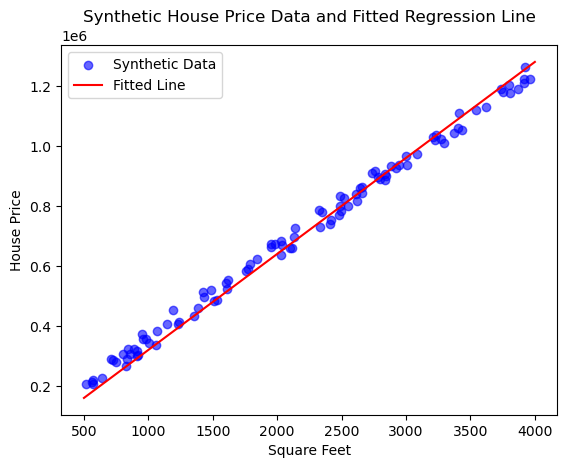

In [50]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(square_feet, house_price, color='blue', label='Synthetic Data', alpha=0.6)

# Generate predictions over a range of square_feet values for the fitted line
x_values = np.linspace(500, 4000, 100)
y_values = theta_0 + theta_1 * x_values  # Line equation based on gradient descent results

# Plot the fitted line
plt.plot(x_values, y_values, color='red', label='Fitted Line')

# Adding labels and title
plt.xlabel('Square Feet')
plt.ylabel('House Price')
plt.title('Synthetic House Price Data and Fitted Regression Line')
plt.legend()

# Show the plot
plt.show()

## Option 3: Linear Regression using Scikit-Learn

Using Scikit-Learn to fit a linear regression model is straightforward with its LinearRegression class. Below is the code to fit a linear model to the synthetic dataset we created.


In [51]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape the square_feet data to make it 2D as required by Scikit-Learn
X = square_feet.reshape(-1, 1)
y = house_price

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get the fitted parameters
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept (theta_0): {intercept}")
print(f"Slope (theta_1): {slope}")


Intercept (theta_0): 54623.2072020818
Slope (theta_1): 299.63962869372585


To verify the Scikit-Learn model fit, we can plot the line alongside the synthetic dataset, similar to the previous plot.

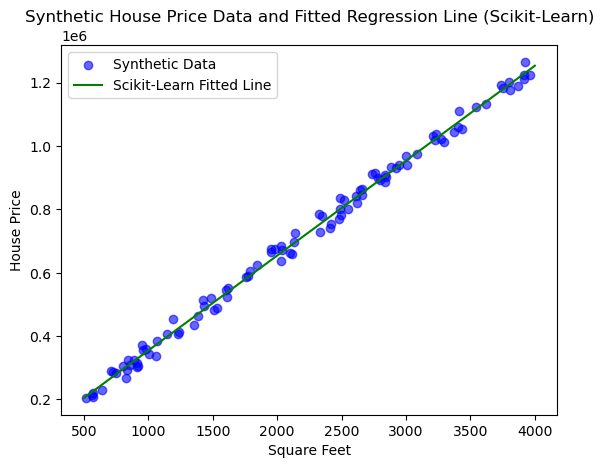

In [52]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(square_feet, house_price, color='blue', label='Synthetic Data', alpha=0.6)

# Generate predictions for the fitted line using Scikit-Learn model
x_values = np.linspace(500, 4000, 100).reshape(-1, 1)
y_values = model.predict(x_values)

# Plot the fitted line
plt.plot(x_values, y_values, color='green', label='Scikit-Learn Fitted Line')

# Adding labels and title
plt.xlabel('Square Feet')
plt.ylabel('House Price')
plt.title('Synthetic House Price Data and Fitted Regression Line (Scikit-Learn)')
plt.legend()

# Show the plot
plt.show()

To predict the house price for a house with square_feet = 2000 using the model fitted with Scikit-Learn, we can use the predict method.

In [53]:
# Define the sample square footage
sample_square_feet = np.array([[2000]])

# Predict the house price for the sample square footage
predicted_price = model.predict(sample_square_feet)
print(f"Predicted house price for {sample_square_feet[0][0]} square feet: ${predicted_price[0]:.2f}")

Predicted house price for 2000 square feet: $653902.46
